<a href="https://colab.research.google.com/github/AadarshLN/Stock-Price-Prediction-Using-RNNs/blob/main/Stock_Price_Prediction_Using_RNN_tf_seperate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-2805024991.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.6144
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0273
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0062
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0010
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 8.0540e-04
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 6.3895e-04
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 6.1318e-04
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 5.5407e-04
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 5.3563e-04
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 5.2721e-04
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 4.9592e-04
Epoch 12/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 4.6258e-04
Epoch 13/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 4.7300e-04
Epoch 14/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 4.8280e-04
Epoch 15/100
18/18 ━━━━━━━━━━

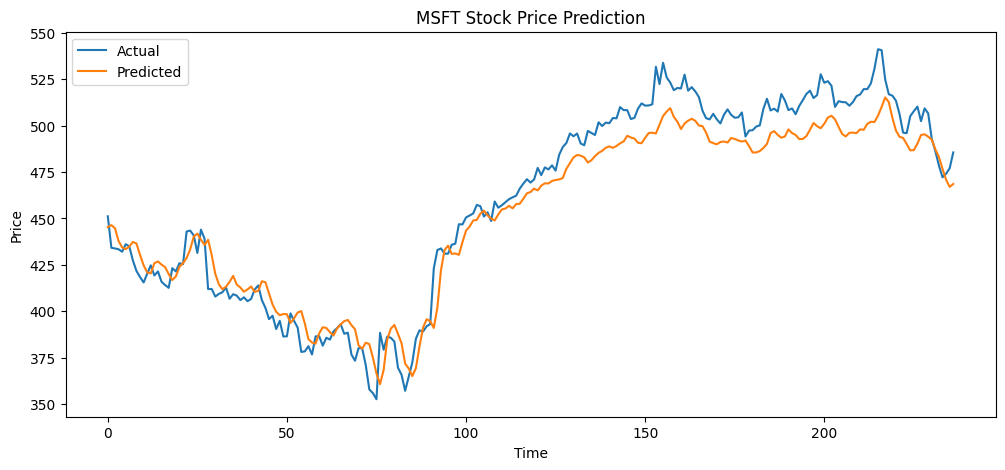

In [ ]:
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

def rnn_stock_prediction(ticker, start_date, end_date, look_back=60, epochs=100, batch_size=64):
    data = yf.download(ticker, start=start_date, end=end_date)
    data = data[['Close']]
    scaler = MinMaxScaler()
    data['Close'] = scaler.fit_transform(np.array(data['Close']).reshape(-1, 1))

    # train and test split
    train_size = int(len(data) * 0.8)
    train_data, test_data = data[:train_size], data[train_size:]

    def create_dataset(dataset, look_back):
        X, Y = [], []
        for i in range(len(dataset) - look_back - 1):
            X.append(dataset['Close'][i:(i + look_back)].values)
            Y.append(dataset['Close'].iloc[i + look_back])
        return np.array(X), np.array(Y)

    X_train, Y_train = create_dataset(train_data, look_back)
    X_test, Y_test = create_dataset(test_data, look_back)

    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    #RNN
    model = Sequential()
    model.add(SimpleRNN(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(SimpleRNN(50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=1)
    train_predict = scaler.inverse_transform(model.predict(X_train))
    Y_train_inv = scaler.inverse_transform(Y_train.reshape(-1, 1))
    test_predict = scaler.inverse_transform(model.predict(X_test))
    Y_test_inv = scaler.inverse_transform(Y_test.reshape(-1, 1))

    train_rmse = math.sqrt(mean_squared_error(Y_train_inv, train_predict))
    test_rmse = math.sqrt(mean_squared_error(Y_test_inv, test_predict))
    train_mae = mean_absolute_error(Y_train_inv, train_predict)
    test_mae = mean_absolute_error(Y_test_inv, test_predict)

    print(f'{ticker} Train RMSE: {train_rmse:.3f}, Test RMSE: {test_rmse:.3f}')
    print(f'{ticker} Train MAE: {train_mae:.3f}, Test MAE: {test_mae:.3f}')

    plt.figure(figsize=(12,5))
    plt.plot(Y_test_inv, label='Actual')
    plt.plot(test_predict, label='Predicted')
    plt.title(f'{ticker} Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

rnn_stock_prediction("MSFT", "2020-01-01", "2025-12-01")


/tmp/ipython-input-2805024991.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.1109
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0011
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 5.6155e-04
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 4.2909e-04
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 3.5604e-04
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 3.2541e-04
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 3.6099e-04
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 4.3488e-04
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 2.7376e-04
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 2.6566e-04
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 3.1101e-04
Epoch 12/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 3.0150e-04
Epoch 13/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 2.9891e-04
Epoch 14/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 2.6625e-04
Epoch 15/

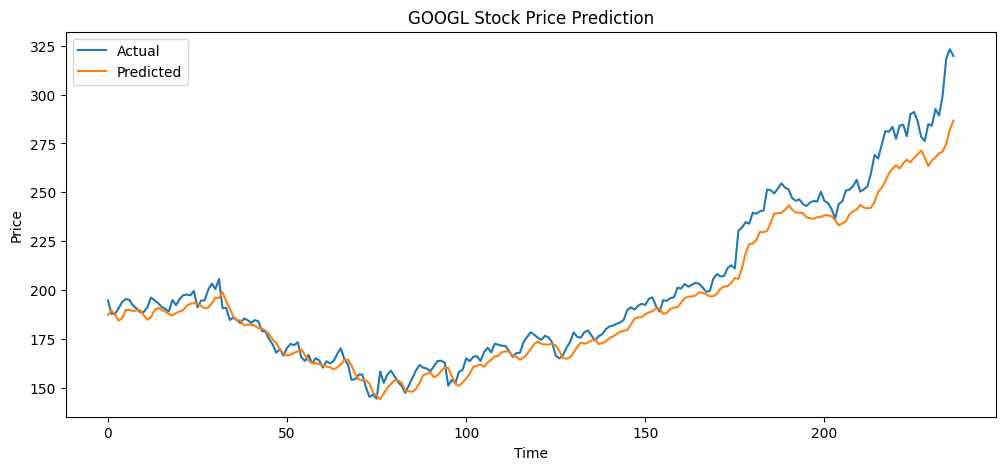

In [ ]:
rnn_stock_prediction("GOOGL", "2020-01-01", "2025-12-01")

/tmp/ipython-input-2805024991.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0497
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0047
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0019
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0011
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 8.1079e-04
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 7.2633e-04
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 6.6696e-04
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 6.2384e-04
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 7.2235e-04
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 6.1398e-04
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 5.7937e-04
Epoch 12/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 5.5952e-04
Epoch 13/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 5.3360e-04
Epoch 14/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 5.9244e-04
Epoch 15/100
18/18 ━━━━━━━━━━

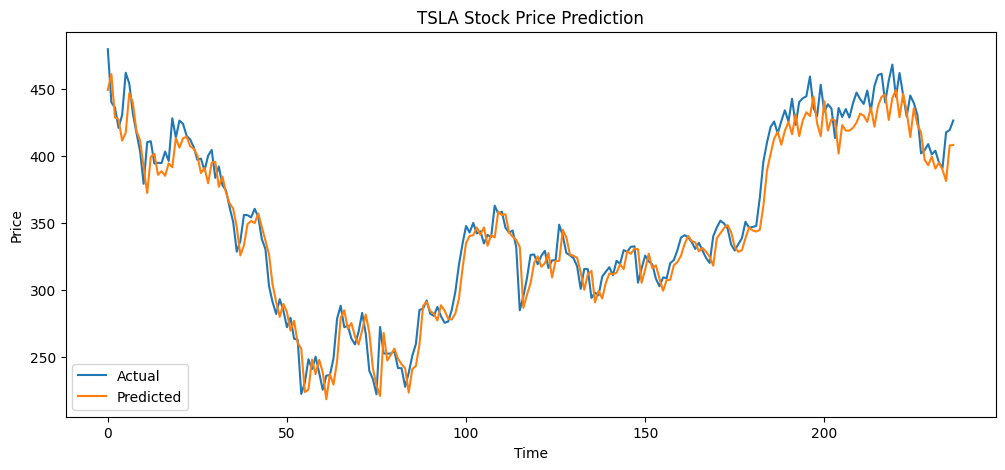

In [ ]:
rnn_stock_prediction("TSLA", "2020-01-01", "2025-12-01")

/tmp/ipython-input-2805024991.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.5134
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0109
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0036
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0025
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0024
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0019
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0019
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0016
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0016
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0015
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0013
Epoch 12/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0013
Epoch 13/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0012
Epoch 14/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0011
Epoch 15/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 9.8041e-

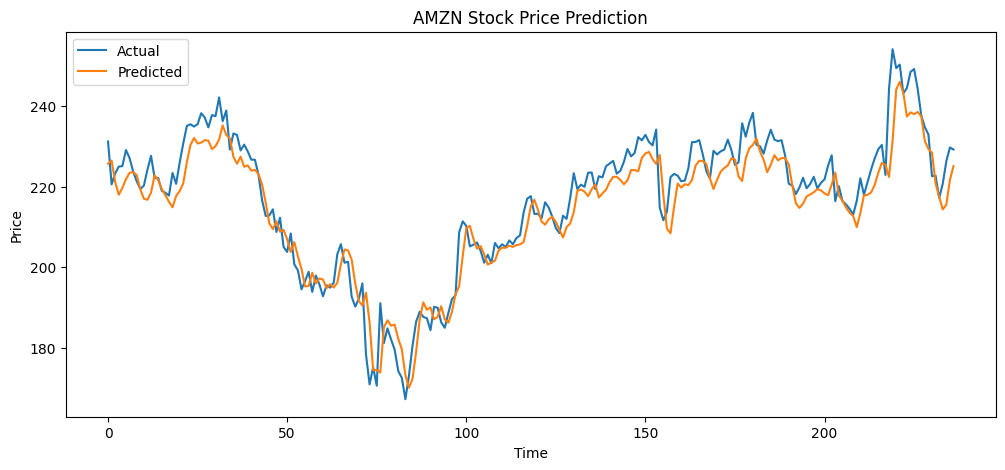

In [ ]:
rnn_stock_prediction("AMZN", "2020-01-01", "2025-12-01")

/tmp/ipython-input-2805024991.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0511
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0031
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0013
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 6.7840e-04
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 5.5566e-04
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 4.8508e-04
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 4.8398e-04
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 5.1420e-04
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 4.1845e-04
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 3.5942e-04
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 3.6753e-04
Epoch 12/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 3.1060e-04
Epoch 13/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 3.7693e-04
Epoch 14/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 3.9591e-04
Epoch 15/100
18/18 ━━━━━━

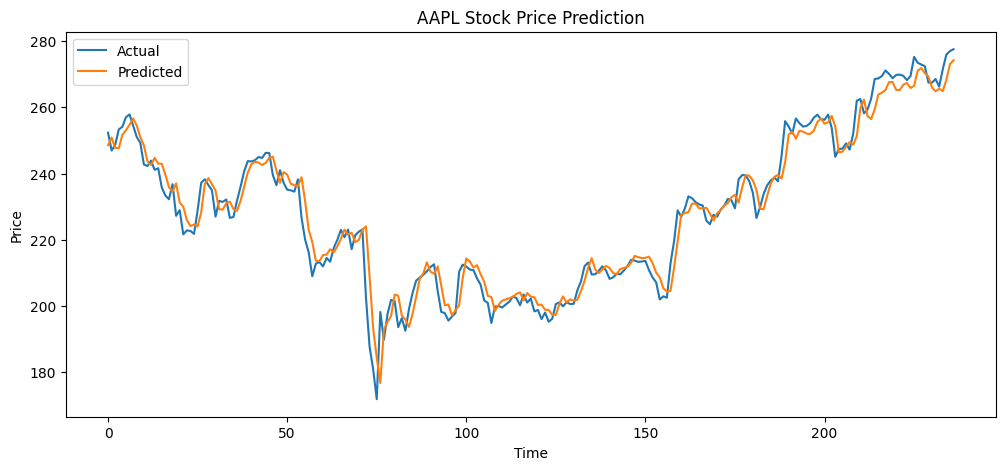

In [ ]:
rnn_stock_prediction("AAPL", "2020-01-01", "2025-12-01")
